## Moneyball Project

### Reading and Understanding the Data

In [1]:
batting <- read.csv('Batting.csv')

In [2]:
head(batting)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,aardsda01,2006,1,CHN,NL,45,43,2,0,0,...,0,0,0,0,0,0,1,0,0,45
3,aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,aardsda01,2008,1,BOS,AL,47,5,1,0,0,...,0,0,0,1,0,0,0,0,0,5
5,aardsda01,2009,1,SEA,AL,73,3,0,0,0,...,0,0,0,0,0,0,0,0,0,NA
6,aardsda01,2010,1,SEA,AL,53,4,0,0,0,...,0,0,0,0,0,0,0,0,0,NA


In [3]:
str(batting)

'data.frame':	97889 obs. of  24 variables:
 $ playerID : chr  "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : chr  "SFN" "CHN" "CHA" "BOS" ...
 $ lgID     : chr  "NL" "NL" "AL" "AL" ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ SO       : int  0 0 0 1 0 0 NA 39 61 54 ...
 $ IBB      : int  0 0 0 0 0 0 NA NA 5 6 ...
 $ HBP    

In [4]:
head(batting$AB)

[1] 0 2 0 1 0 0

In [5]:
head(batting$X2B)

[1] 0 0 0 0 0 0

### Feature Engineering

#### Batting Average

In [6]:
batting$BA <- batting$H / batting$AB

In [7]:
tail(batting$BA,5)

[1] 0.1230769 0.2746479 0.1470588 0.2745098 0.2138728

#### On Base Percentage

In [8]:
batting$OBP <- (batting$H + batting$BB + batting$HBP)/(batting$AB + batting$BB + batting$HBP + batting$SF)

#### Slugging Average

In [9]:
batting$X1B <- batting$H - batting$X2B - batting$X3B - batting$HR

In [10]:
batting$SLG <- ((1*batting$X1B) + (2*batting$X2B) + (3*batting$X3B) + (4*batting$HR)) / batting$AB

In [11]:
str(batting)

'data.frame':	97889 obs. of  28 variables:
 $ playerID : chr  "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : chr  "SFN" "CHN" "CHA" "BOS" ...
 $ lgID     : chr  "NL" "NL" "AL" "AL" ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ SO       : int  0 0 0 1 0 0 NA 39 61 54 ...
 $ IBB      : int  0 0 0 0 0 0 NA NA 5 6 ...
 $ HBP    

In [12]:
summary(batting)

   playerID             yearID         stint          teamID         
 Length:97889       Min.   :1871   Min.   :1.000   Length:97889      
 Class :character   1st Qu.:1931   1st Qu.:1.000   Class :character  
 Mode  :character   Median :1970   Median :1.000   Mode  :character  
                    Mean   :1962   Mean   :1.077                     
                    3rd Qu.:1995   3rd Qu.:1.000                     
                    Max.   :2013   Max.   :5.000                     
                                                                     
     lgID                 G            G_batting            AB       
 Length:97889       Min.   :  1.00   Min.   :  0.00   Min.   :  0.0  
 Class :character   1st Qu.: 13.00   1st Qu.:  7.00   1st Qu.:  9.0  
 Mode  :character   Median : 35.00   Median : 32.00   Median : 61.0  
                    Mean   : 51.65   Mean   : 49.13   Mean   :154.1  
                    3rd Qu.: 81.00   3rd Qu.: 81.00   3rd Qu.:260.0  
                    

#### Excluding data before 1985

In [13]:
batting <- subset(batting, yearID>=1985)

In [14]:
summary(batting)

   playerID             yearID         stint         teamID         
 Length:35652       Min.   :1985   Min.   :1.00   Length:35652      
 Class :character   1st Qu.:1993   1st Qu.:1.00   Class :character  
 Mode  :character   Median :2000   Median :1.00   Mode  :character  
                    Mean   :2000   Mean   :1.08                     
                    3rd Qu.:2007   3rd Qu.:1.00                     
                    Max.   :2013   Max.   :4.00                     
                                                                    
     lgID                 G           G_batting            AB       
 Length:35652       Min.   :  1.0   Min.   :  0.00   Min.   :  0.0  
 Class :character   1st Qu.: 14.0   1st Qu.:  4.00   1st Qu.:  3.0  
 Mode  :character   Median : 34.0   Median : 27.00   Median : 47.0  
                    Mean   : 51.7   Mean   : 46.28   Mean   :144.7  
                    3rd Qu.: 77.0   3rd Qu.: 77.00   3rd Qu.:241.0  
                    Max.   :163.0 

In [15]:
sal <- read.csv('Salaries.csv')

In [16]:
summary(sal)

     yearID        teamID              lgID             playerID        
 Min.   :1985   Length:23956       Length:23956       Length:23956      
 1st Qu.:1993   Class :character   Class :character   Class :character  
 Median :1999   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1999                                                           
 3rd Qu.:2006                                                           
 Max.   :2013                                                           
     salary        
 Min.   :       0  
 1st Qu.:  250000  
 Median :  507950  
 Mean   : 1864357  
 3rd Qu.: 2100000  
 Max.   :33000000  

### Merging Salaries data with Batting data

In [17]:
combo <- merge(batting,sal,by=c('playerID','yearID'))

In [18]:
summary(combo)

   playerID             yearID         stint         teamID.x        
 Length:25397       Min.   :1985   Min.   :1.000   Length:25397      
 Class :character   1st Qu.:1993   1st Qu.:1.000   Class :character  
 Mode  :character   Median :1999   Median :1.000   Mode  :character  
                    Mean   :1999   Mean   :1.098                     
                    3rd Qu.:2006   3rd Qu.:1.000                     
                    Max.   :2013   Max.   :4.000                     
                                                                     
    lgID.x                G            G_batting            AB       
 Length:25397       Min.   :  1.00   Min.   :  0.00   Min.   :  0.0  
 Class :character   1st Qu.: 26.00   1st Qu.:  8.00   1st Qu.:  5.0  
 Mode  :character   Median : 50.00   Median : 42.00   Median : 85.0  
                    Mean   : 64.06   Mean   : 57.58   Mean   :182.4  
                    3rd Qu.:101.00   3rd Qu.:101.00   3rd Qu.:336.0  
                    

### Analysing Lost Players

In [19]:
lost_players <- subset(combo, playerID %in% c('giambja01', 'damonjo01','saenzol01'))

In [20]:
lost_players <- subset(lost_players, yearID==2001)

In [21]:
lost_players <- lost_players[,c('playerID', 'H', 'X2B', 'X3B', 'HR', 'OBP', 'SLG', 'BA', 'AB')]
lost_players

,playerID,H,X2B,X3B,HR,OBP,SLG,BA,AB
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
5141,damonjo01,165,34,4,9,0.3235294,0.3633540,0.2562112,644
7878,giambja01,178,47,2,38,0.4769001,0.6596154,0.3423077,520
20114,saenzol01,67,21,1,9,0.2911765,0.3836066,0.2196721,305


### Replacement Players

In [22]:
combo <- subset(combo, yearID==2001)
str(combo)

'data.frame':	915 obs. of  31 variables:
 $ playerID : chr  "abbotje01" "abbotku01" "abbotpa01" "abreubo01" ...
 $ yearID   : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID.x : chr  "FLO" "ATL" "SEA" "PHI" ...
 $ lgID.x   : chr  "NL" "NL" "AL" "NL" ...
 $ G        : int  28 6 28 162 43 91 58 124 113 57 ...
 $ G_batting: int  28 6 2 162 41 91 54 124 113 57 ...
 $ AB       : int  42 9 4 588 39 296 0 457 387 175 ...
 $ R        : int  5 0 0 118 2 28 0 64 44 20 ...
 $ H        : int  11 2 1 170 2 82 0 111 106 46 ...
 $ X2B      : int  3 0 0 48 1 14 0 22 16 13 ...
 $ X3B      : int  0 0 0 4 0 2 0 0 4 2 ...
 $ HR       : int  0 0 0 31 0 6 0 17 4 4 ...
 $ RBI      : int  5 0 0 110 1 27 0 49 32 20 ...
 $ SB       : int  0 1 0 36 0 4 0 5 8 1 ...
 $ CS       : int  0 0 0 14 0 5 0 0 6 2 ...
 $ BB       : int  3 0 0 106 3 36 0 51 23 19 ...
 $ SO       : int  7 3 1 137 19 73 0 62 56 37 ...
 $ IBB      : int  0 0 0 11 0 0 0 0 0 1 ...
 

In [23]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Warning message:
"Removed 168 rows containing missing values (geom_point)."


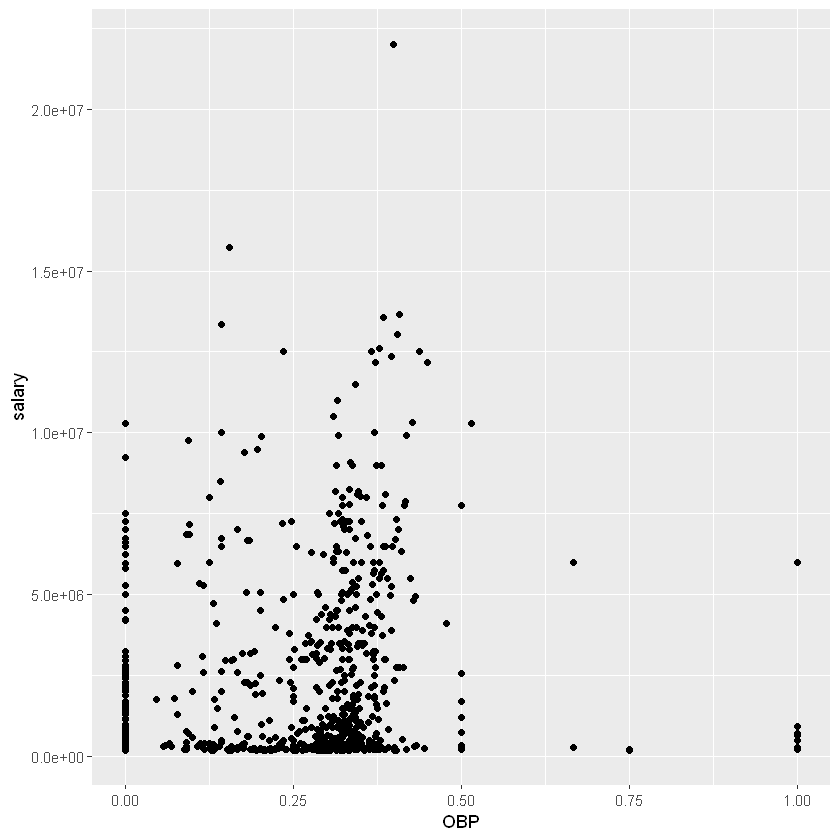

In [24]:
ggplot(combo, aes(x=OBP, y=salary)) + geom_point()

#### Filtering for players with salary<8Mn. Excluding players with OBP=0 

In [25]:
combo <- subset(combo, salary < 8000000 & OBP > 0)
str(combo)

'data.frame':	602 obs. of  31 variables:
 $ playerID : chr  "abbotje01" "abbotku01" "abbotpa01" "abreubo01" ...
 $ yearID   : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID.x : chr  "FLO" "ATL" "SEA" "PHI" ...
 $ lgID.x   : chr  "NL" "NL" "AL" "NL" ...
 $ G        : int  28 6 28 162 43 91 124 113 57 157 ...
 $ G_batting: int  28 6 2 162 41 91 124 113 57 157 ...
 $ AB       : int  42 9 4 588 39 296 457 387 175 575 ...
 $ R        : int  5 0 0 118 2 28 64 44 20 113 ...
 $ H        : int  11 2 1 170 2 82 111 106 46 193 ...
 $ X2B      : int  3 0 0 48 1 14 22 16 13 34 ...
 $ X3B      : int  0 0 0 4 0 2 0 4 2 12 ...
 $ HR       : int  0 0 0 31 0 6 17 4 4 20 ...
 $ RBI      : int  5 0 0 110 1 27 49 32 20 100 ...
 $ SB       : int  0 1 0 36 0 4 5 8 1 30 ...
 $ CS       : int  0 0 0 14 0 5 0 6 2 6 ...
 $ BB       : int  3 0 0 106 3 36 51 23 19 80 ...
 $ SO       : int  7 3 1 137 19 73 62 56 37 71 ...
 $ IBB      : int  0 0 0 11 0

#### total AB of lost players=1469 ~ 1500. Lets cutoff possible targets AB at 500 i.e., 1500/3

In [26]:
combo <- subset(combo, AB>=500)

#### Sort by OBP

In [27]:
targets <- head(arrange(combo, desc(OBP)),10)

In [28]:
targets <- targets[,c('playerID','OBP','AB','salary')]
targets

,playerID,OBP,AB,salary
,<chr>,<dbl>,<int>,<int>
1,giambja01,0.4769001,520,4103333
2,heltoto01,0.4316547,587,4950000
3,berkmla01,0.4302326,577,305000
4,gonzalu01,0.4285714,609,4833333
5,thomeji01,0.4161491,526,7875000
6,alomaro01,0.4146707,575,7750000
7,edmonji01,0.4102142,500,6333333
8,gilesbr02,0.4035608,576,7333333
9,pujolal01,0.4029630,590,200000


#### Should exclude giambja01. So, Top 5 targets should be....

In [29]:
print(targets[2:6,])

   playerID       OBP  AB  salary
2 heltoto01 0.4316547 587 4950000
3 berkmla01 0.4302326 577  305000
4 gonzalu01 0.4285714 609 4833333
5 thomeji01 0.4161491 526 7875000
6 alomaro01 0.4146707 575 7750000


## END!!!